In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [16]:
data_path = 'drive/MyDrive/Movies/final_dataset.csv'
df = pd.read_csv(data_path)

In [17]:
print("Tổng quan dữ liệu:")
print(df.info())
print("\nThống kê mô tả:")
print(df.describe())

Tổng quan dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userId         30000 non-null  int64  
 1   movieId        30000 non-null  int64  
 2   rating         30000 non-null  float64
 3   title          30000 non-null  object 
 4   genres         30000 non-null  object 
 5   imdbId         30000 non-null  int64  
 6   movielens_url  30000 non-null  object 
 7   imdb           30000 non-null  object 
 8   tag            30000 non-null  object 
 9   poster_link    29998 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 2.3+ MB
None

Thống kê mô tả:
             userId        movieId        rating        imdbId
count  30000.000000   30000.000000  30000.000000  3.000000e+04
mean   10031.023067   72373.213967      3.618483  1.614669e+06
std     5788.336741   76079.326356      1.121284  2.573702e+06
min     

In [18]:
print("\nSố lượng bản ghi:")
print(f"Tổng số bản ghi: {len(df)}")
print(f"Số lượng phim duy nhất: {df['movieId'].nunique()}")
print(f"Số lượng người dùng duy nhất: {df['userId'].nunique()}")


Số lượng bản ghi:
Tổng số bản ghi: 30000
Số lượng phim duy nhất: 10201
Số lượng người dùng duy nhất: 1675


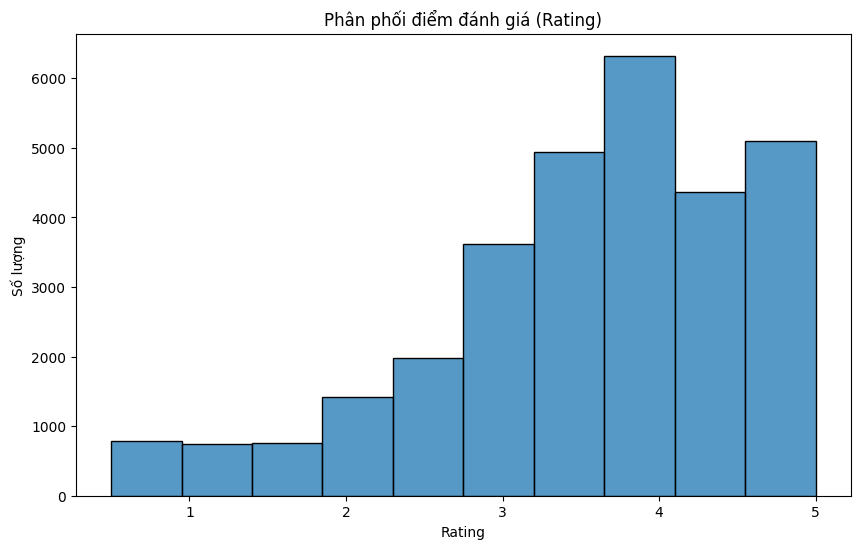

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=False)
plt.title('Phân phối điểm đánh giá (Rating)')
plt.xlabel('Rating')
plt.ylabel('Số lượng')
plt.show()

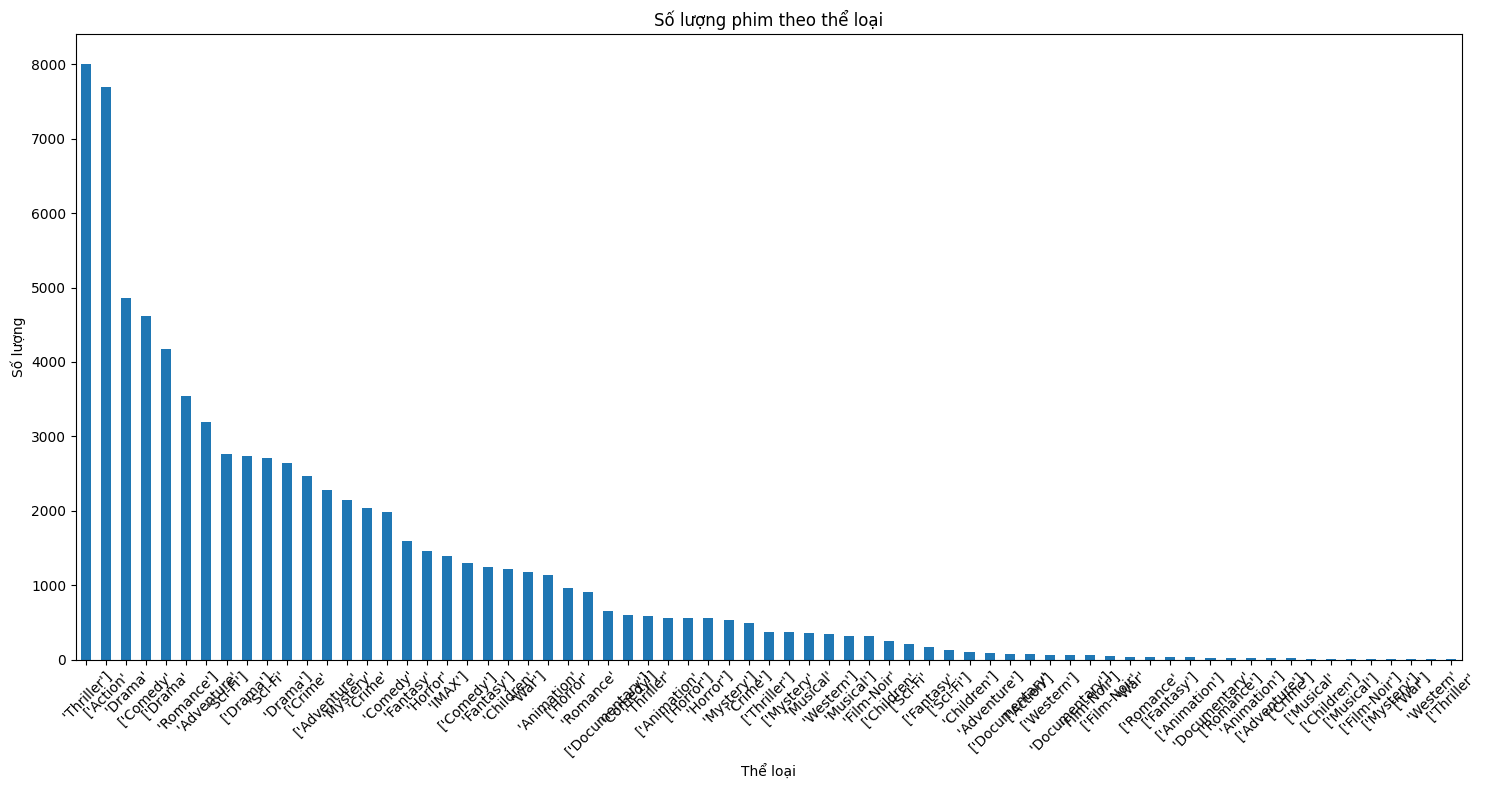

In [24]:
genres = df['genres'].str.split(',').explode().value_counts()
plt.figure(figsize=(15, 8))
genres.plot(kind='bar')
plt.title('Số lượng phim theo thể loại')
plt.xlabel('Thể loại')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

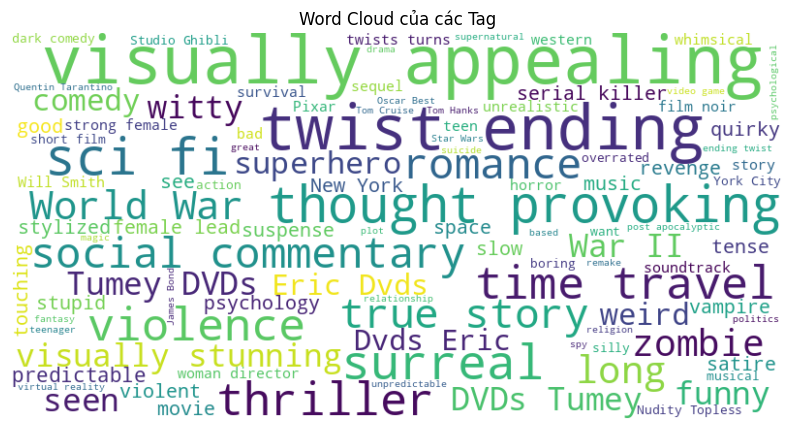

In [21]:
tags_text = ' '.join(df['tag'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(tags_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud của các Tag')
plt.show()

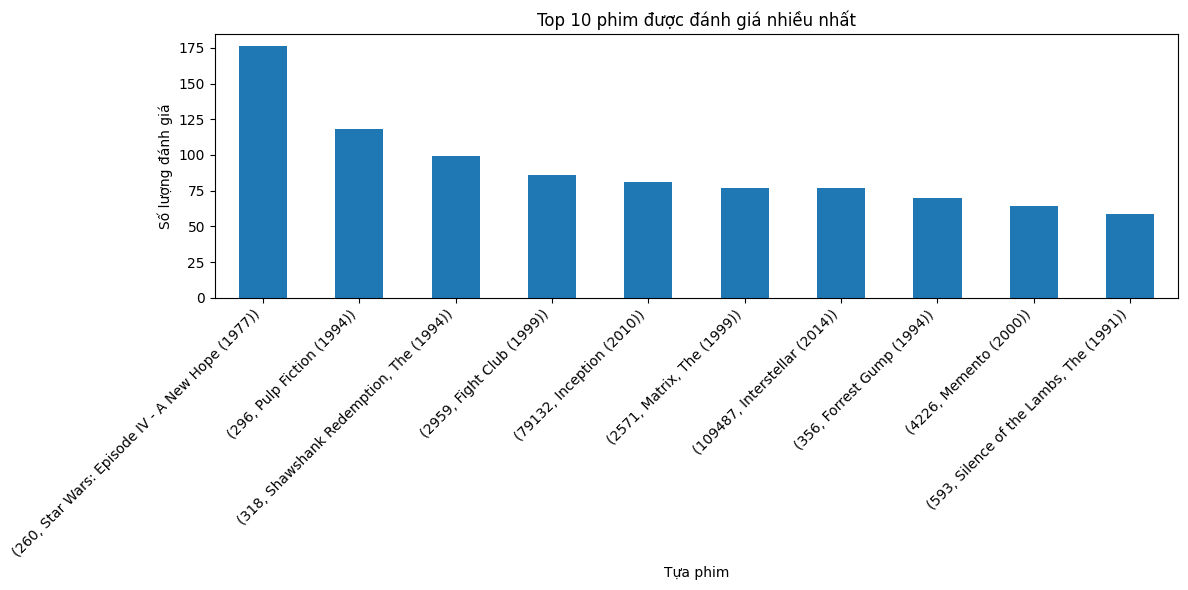

In [25]:
top_movies = df.groupby(['movieId', 'title'])['rating'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_movies.plot(kind='bar')
plt.title('Top 10 phim được đánh giá nhiều nhất')
plt.xlabel('Tựa phim')
plt.ylabel('Số lượng đánh giá')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

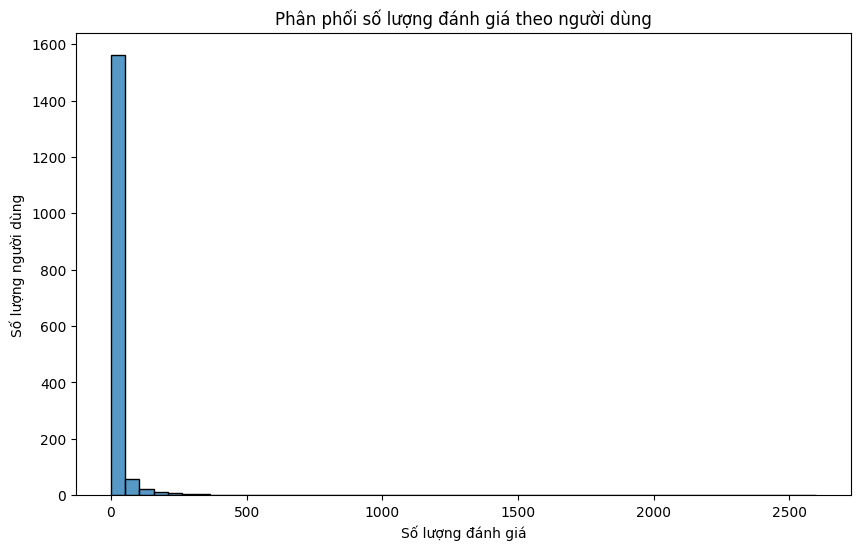

In [26]:
ratings_per_user = df.groupby('userId')['rating'].count()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=50, kde=False)
plt.title('Phân phối số lượng đánh giá theo người dùng')
plt.xlabel('Số lượng đánh giá')
plt.ylabel('Số lượng người dùng')
plt.show()